In [10]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import manage_gradient_grid
import manage_kernel
import visualization

### Visualization of the weights that quantify the influence of a peak (a gradient instance) on its neighborhood

The peak is positionned on the center of the array.
In classical Perlin noise, it has influence on 4 cells, each of which appears here in four quarter of the array, the top-left quarter, the top-right quarter, the bottom-left quarter, the bottom-right quarter

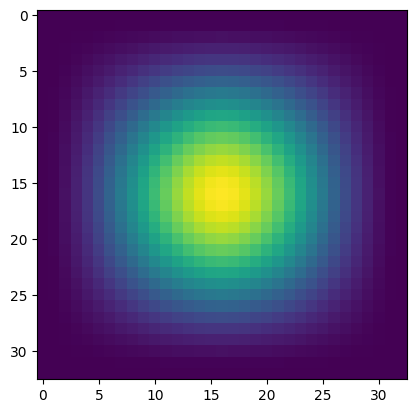

In [11]:
plt.imshow(manage_kernel.build_centered_smoothstep_kernel(cell_size = 16))

### Visualization of the offset vector field

These are simply the vectors that contain the coordinates of a point in the cell's frame of reference.
The origin is located at the center, i.e. the cell in which these vectors actually represent point coordinates is the one at top right.

Note that for the other cells (top left and bottom two), the vectors can have negative components, which corresponds to what we do in the classic method when we subtract 1 from certain components.

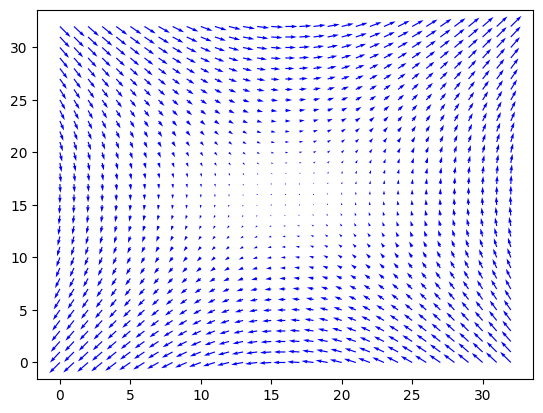

In [15]:
visualization.visualize_vector_field_quiver(manage_kernel.build_offset_field(cell_size=16))

### Visualization of the final kernel

This is actually the kernel (also called "impulse response" in signal processing filter theory) we will convolve with the peaks (the gradients) to get the perlin noise, it takes acount of both offset field and fading weights.

Its squared amplitude is the power spectrum of the noise that you can see in some papers.

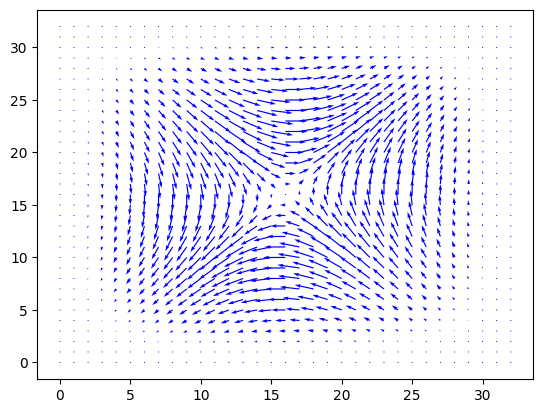

In [19]:
visualization.visualize_vector_field_quiver(manage_kernel.build_perlin_kernel(cell_size=16).squeeze())

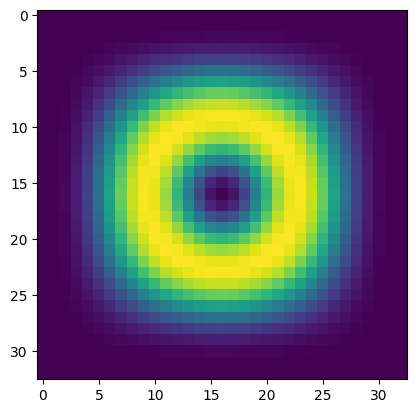

In [23]:
# PSD

kernel = manage_kernel.build_perlin_kernel(cell_size=16).squeeze()
plt.imshow(kernel[0]**2 + kernel[1]**2)